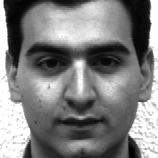

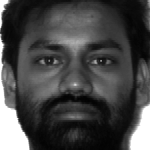

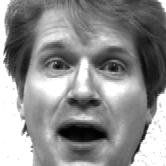

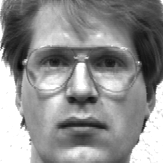

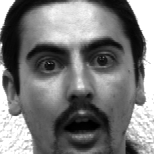

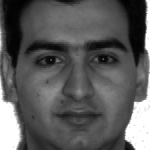

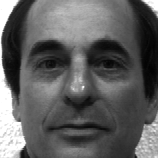

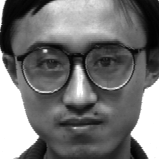

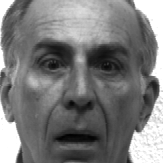

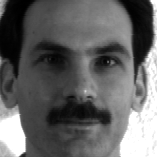

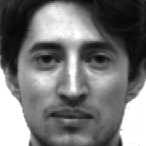

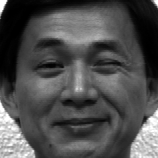

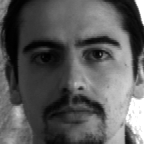

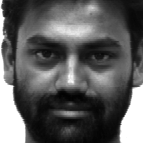

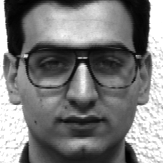

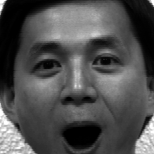

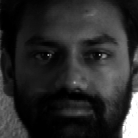

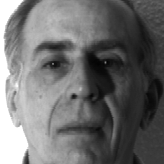

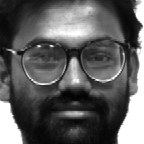

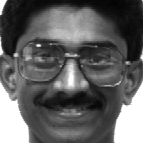

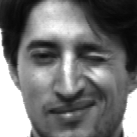

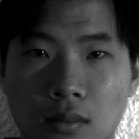

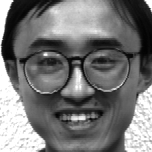

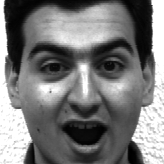

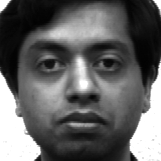

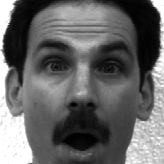

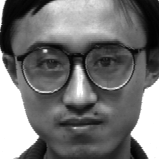

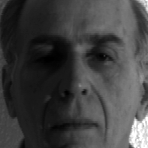

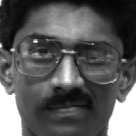

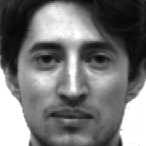

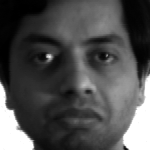

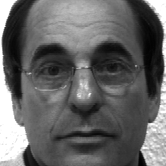

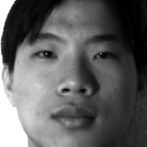

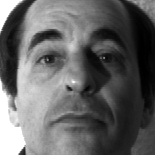

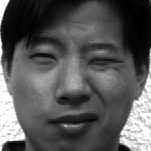

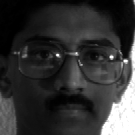

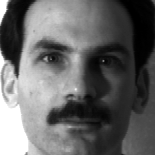

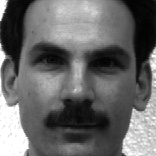

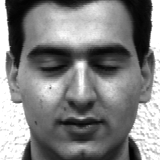

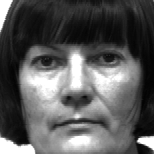

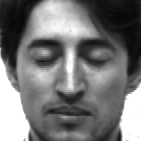

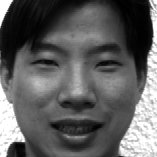

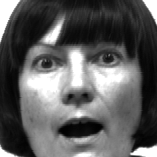

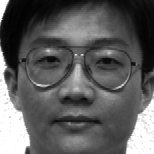

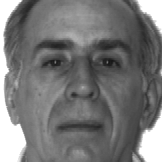

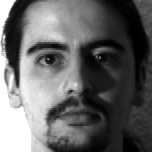

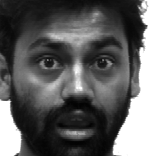

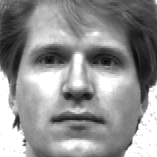

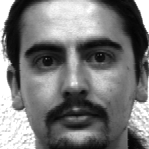

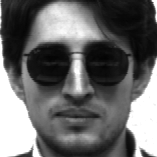

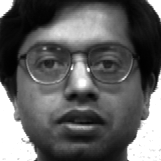

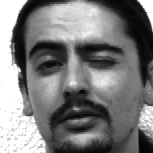

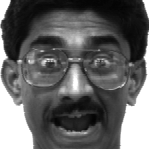

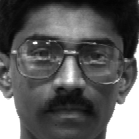

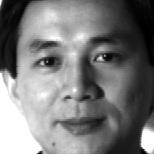

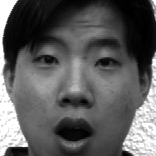

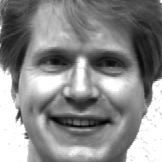

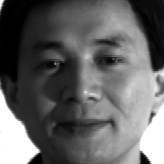

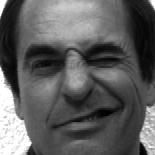

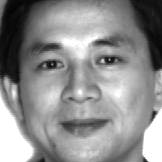

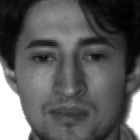

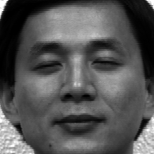

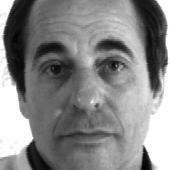

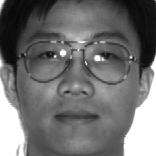

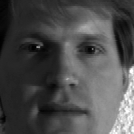

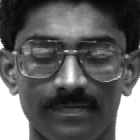

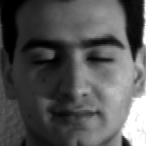

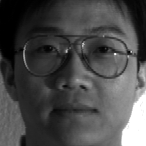

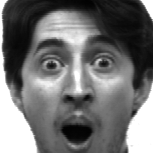

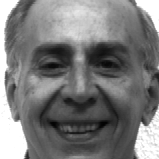

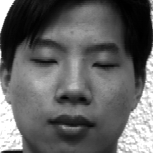

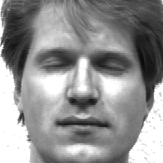

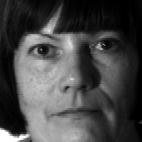

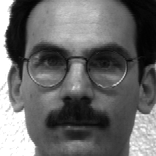

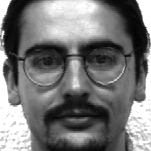

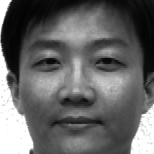

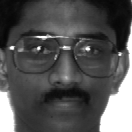

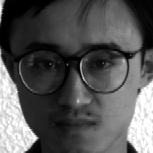

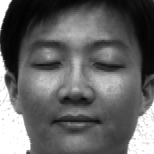

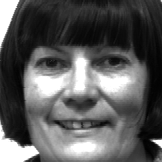

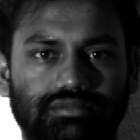

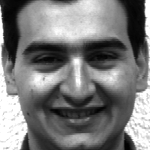

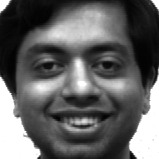

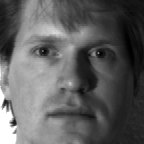

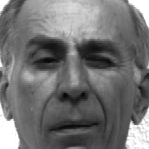

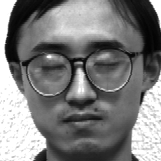

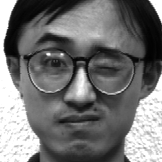

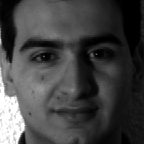

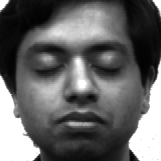

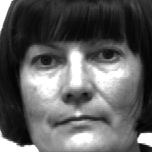

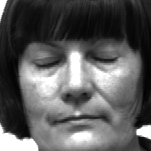

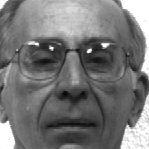

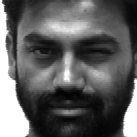

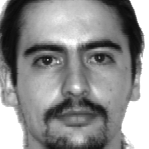

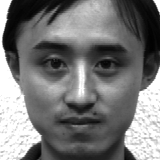

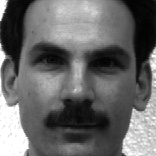

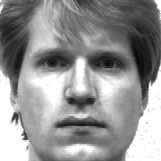

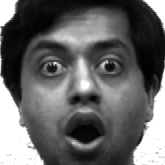

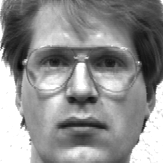

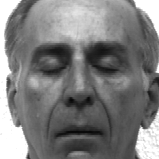

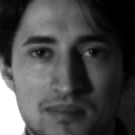

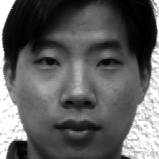

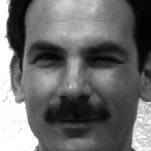

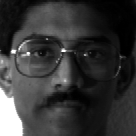

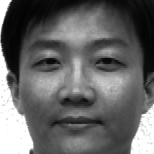

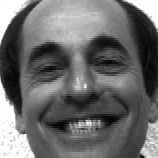

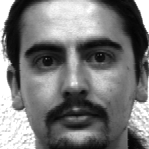

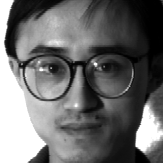

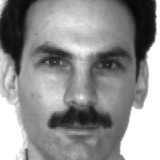

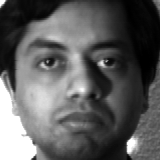

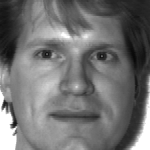

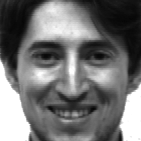

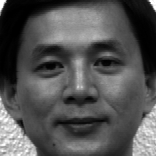

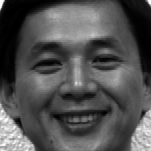

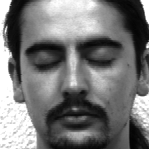

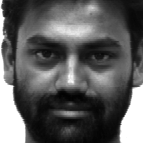

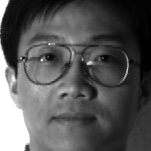

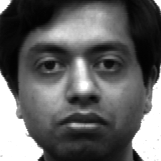

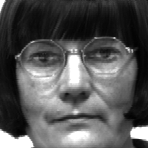

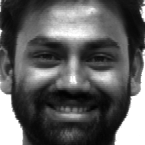

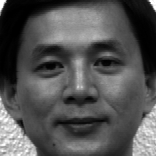

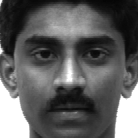

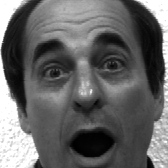

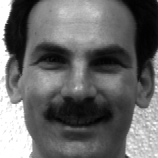

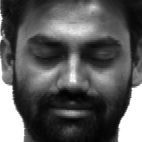

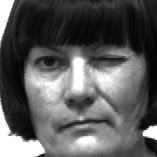

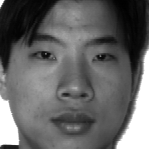

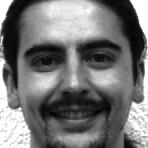

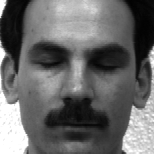

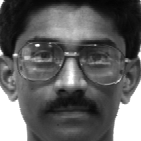

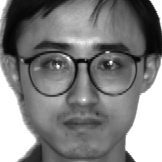

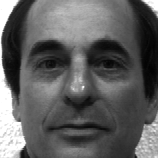

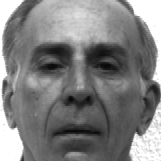

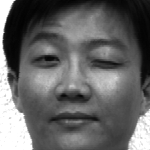

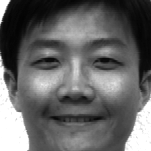

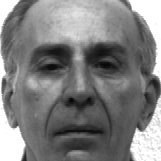

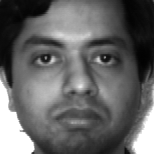

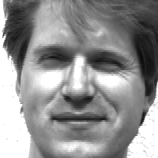

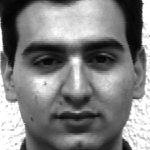

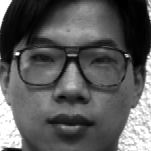

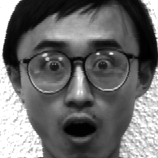

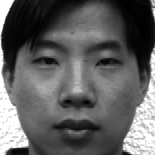

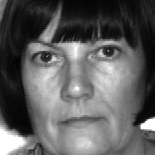

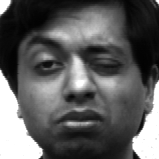

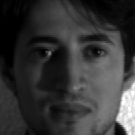

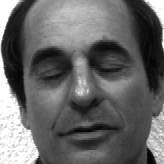

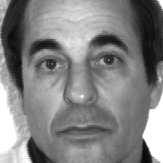

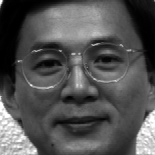

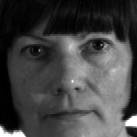

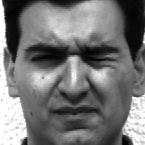

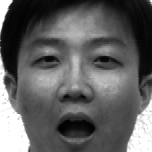

10 Успешно распознано с вероятностью 25.485826004911853
13 Успешно распознано с вероятностью 36.261214553130074
4 Успешно распознано с вероятностью 0.0
8 Успешно распознано с вероятностью 67.78277828058381
15 Успешно распознано с вероятностью 32.86989791386682
3 Успешно распознано с вероятностью 43.47629904102858
7 Успешно распознано с вероятностью 42.07498858952902
2 Успешно распознано с вероятностью 35.49467125513262
6 Успешно распознано с вероятностью 30.617649295244288
11 Успешно распознано с вероятностью 37.70928857285139
1 Успешно распознано с вероятностью 39.651251744453255
9 Успешно распознано с вероятностью 48.12459852823689
12 Успешно распознано с вероятностью 33.884765520689534
5 Успешно распознано с вероятностью 32.31531084262701
14 Успешно распознано с вероятностью 36.65706957155049


In [0]:
import os

import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow





def face_recognize():
  cascadePath = "/content/haarcascade_frontalface_default.xml"
  faceCascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  recognizer = cv2.face.LBPHFaceRecognizer_create()
  path = '/content/yalefaces'
  
  def get_images_and_labels(path):
    image_paths = [os.path.join(path, f) for f in os.listdir(path) if not f.endswith('.sad')]
    images = []
    labels = []
    for image_path in image_paths:
      image_pil = Image.open(image_path).convert('L')
      image = np.array(image_pil, 'uint8')
      nbr = int(os.path.split(image_path)[1].split(".")[0].replace("subject", ""))
      faces = faceCascade.detectMultiScale(image)
      for (x, y, w, h) in faces:
        images.append(image[y: y + h, x: x + w])
        labels.append(nbr)
        cv2_imshow(image[y: y + h, x: x + w])
        cv2.waitKey(50)
    return images, labels
  images, labels = get_images_and_labels(path)
  cv2.destroyAllWindows()
  recognizer.train(images, np.array(labels))
  image_paths = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.sad')]

  for image_path in image_paths:
    predict_image_pil = Image.open(image_path).convert('L')
    predict_image = np.array(predict_image_pil, 'uint8')
    faces = faceCascade.detectMultiScale(predict_image)
    for (x, y, w, h) in faces:
      nbr_predicted, conf = recognizer.predict(predict_image[y: y + h, x: x + w])
      nbr_actual = int(os.path.split(image_path)[1].split(".")[0].replace("subject", ""))
      if nbr_actual == nbr_predicted:
        print("{} Успешно распознано с вероятностью {}".format(nbr_actual, conf))
      else:
        print
        "{} is Incorrectly Recognized as {}".format(nbr_actual, nbr_predicted)
        cv2_imshow("Recognizing Face", predict_image[y: y + h, x: x + w])
        cv2.waitKey(1000)
  recognizer.train(images, np.array(labels))



face_recognize()

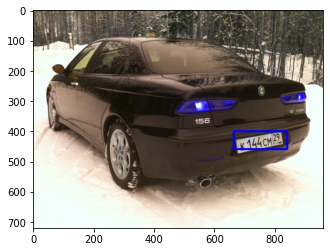

In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Розпізнавання автомобільних номерів на зображенні
def car_id_recognize(image_path):
    pixels = cv2.imread(image_path)
    classifier = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
    boxes = classifier.detectMultiScale(pixels)

    for box in boxes:
        x, y, width, height = box
        x2, y2 = x + width, y + height
        cv2.rectangle(pixels, (x, y), (x2, y2), (0, 0, 255), 5)

    plt.imshow(pixels)
    plt.show()


car_id_recognize('/content/57148fu-960.jpg')